# Deep Learning

## HW1- problem 2- Support Vector Machine (100 + 10 pts)

### Please fill this part


1.   Full Name: Mohammadreza Estarki 
2.   Student Number: 400209184 


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# You are not allowed to import other packages.
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

import cvxopt

#### About the Data:
Heart diseases, also known as [Cardiovascular diseases (CVDs)](https://en.wikipedia.org/wiki/Cardiovascular_disease), are the first cause of death worldwide, taking an estimated 17.9 million lives each year which is about 32% of all deaths all over the world. 

In the present HomeWork, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

For this perpose, `Heart_Disease_Dataset.csv` file can be used that is attached to the HomeWork folder. Use `Dataset_Description.pdf` for more detail.


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning - HW1/data/Heart_Disease_Dataset.csv") 

### Pre-Processing - (40 pts)

#### Exploratory Data Analysis (EDA):
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

shape of dataset is:  (1190, 12)
this dataset has not missing value
 age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
------------------------------------------
ballanced: True


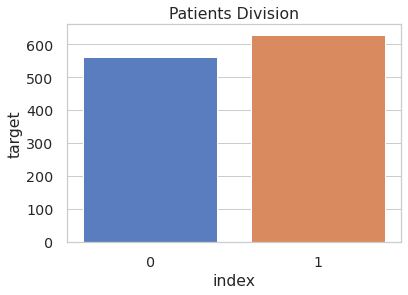

In [4]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################
shape = df.shape
print("shape of dataset is: " , shape)

###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################

missings = df.isnull().sum()
print("this dataset has not missing value\n",missings)

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
## If the difference between 2 classes was less than 100 for our dataset,    ##
## it is called "ballanced".                                                 ##
###############################################################################

patients_divide=df.target.value_counts().reset_index()
pa_target=patients_divide.target
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.3)
sns.barplot(x='index', y='target', data=patients_divide).set(title="Patients Division")
ballance_check=np.abs(pa_target[0]-pa_target[1])
print("------------------------------------------")
if ballance_check <= 100:
  print("ballanced: True")
else:
  print("ballanced: False")

--------------------- Age Distirbution on Healty Patients According to Genders--------------------------


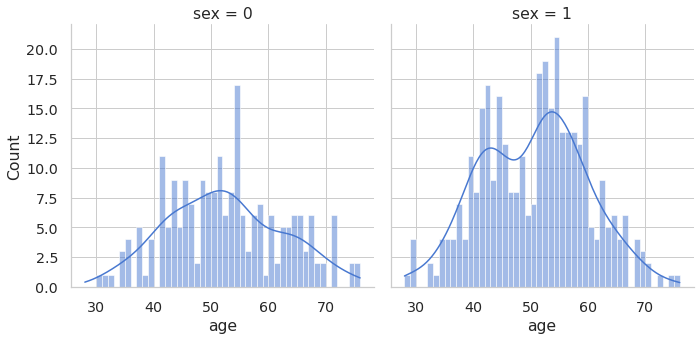

In [5]:
###############################################################################
## TODO: plot the age distirbution and gender distrbution for both normal    ##
## and heart diseses patients.(4 plots)                                      ##
###############################################################################
print("--------------------- Age Distirbution on Healty Patients According to Genders--------------------------")
# age distirbution on normal patients
sns.displot(df[df.target==0].target,x=df[df.target==0].age,col=df[df.target==0].sex, kde=True, binwidth=1)

--------------------- Age Distirbution on Heart Diseses Patients According to Genders--------------------------


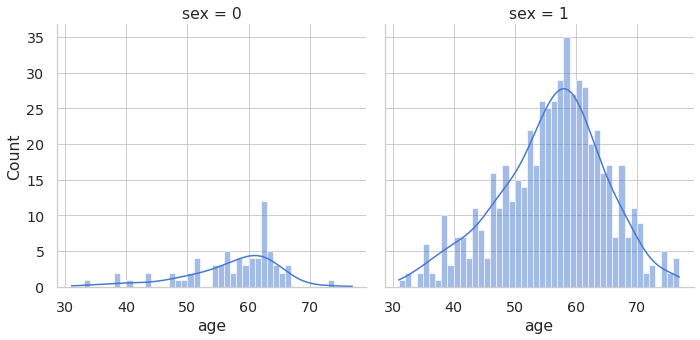

In [6]:
print("--------------------- Age Distirbution on Heart Diseses Patients According to Genders--------------------------")
# age distirbution on heart diseses patients
sns.displot(df[df.target==1].target,x=df[df.target==1].age,col=df[df.target==1].sex, kde=True, binwidth=1)

#### Question 1: What do you conclude from the plots?
#### Answer: According to the plots the data is not equally shared among both genders. Number healthy people in dataset distribute uniformly between ages but this fact in risky ones is not true.  Moreover, the number of women prone to heart disease is far higher compared to men. Furthermore, the most vulnerable men regarding the risk of heart disease are between 55 to 65, while, their counterparts are between 45 to 70 years old.

#### Outlier Detection & Removal:
We will filter ouliers using Z-test.

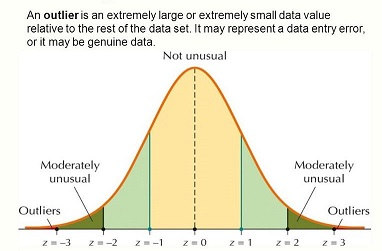

Z-test formula:
\begin{equation*}
    Z = \bigg|\frac {x - mu} {std}\bigg|
\end{equation*}

In [7]:
################################################################################
## TODO: Suppose that, based on our prior knowledge, we know some columns have##
## outliers. Calculate z-score for each featuer and determine the outliers    ##
## with threshold=3, then eliminate them. Target dataframe has(1173,12)shape. ##
################################################################################
columns = ["age","resting bp s","cholesterol","max heart rate"]
threshold = 3
mu= df[columns].mean()
sd = df[columns].std()
Z=np.abs((df[columns]-mu)/sd)
outliers_index=np.where(Z > threshold)
df.drop(outliers_index[0], axis=0, inplace=True)
shape = df.shape
print("shape of dataset after eliminate outliers is: " , shape)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

shape of dataset after eliminate outliers is:  (1173, 12)


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.


In [8]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized. type of features is ##
## determined in dataset description file.                                    ##
################################################################################
numeric_col = ["age","resting bp s","cholesterol","max heart rate","oldpeak"]
df[numeric_col] = (df[numeric_col] - df[numeric_col].min()) / (df[numeric_col].max() - df[numeric_col].min())
display(df)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1,2,0.571429,0.588595,0,0,0.777778,0,0.295455,1,0
1,0.428571,0,3,0.761905,0.366599,0,0,0.659259,0,0.409091,2,1
2,0.183673,1,2,0.476190,0.576375,0,1,0.229630,0,0.295455,1,0
3,0.408163,0,4,0.552381,0.435845,0,0,0.303704,1,0.465909,2,1
4,0.530612,1,3,0.666667,0.397149,0,0,0.407407,0,0.295455,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,0.346939,1,1,0.285714,0.537678,0,0,0.481481,0,0.431818,2,1
1186,0.816327,1,4,0.609524,0.393075,1,0,0.548148,0,0.681818,2,1
1187,0.591837,1,4,0.476190,0.266802,0,0,0.355556,1,0.431818,2,1
1188,0.591837,0,2,0.476190,0.480652,0,2,0.792593,0,0.295455,2,1


### SVM - (60 pts)

#### spliting data

In [9]:
# The original dataset labels is 0 and 1 and in the following code we change it to -1 and 1. 
df.target.replace(0 , -1 , inplace = True) 
# make a copy of dataframe for Bouns Section
df_Bouns=df.copy()
# Turn pandas dataframe to numpy array type
df = df.to_numpy()

# Splitting data into train and test part. 70% for train and 30% for test
train = df[:int(len(df) * 0.7)]
test = df[int(len(df) * 0.7):]

# Getting features 
X_train = train[: , :-1]
y_train = train[: , -1]

# Getting labels
X_test = test[: , :-1]
y_test = test[: , -1]

# shapes should be: 
# Train: (821, 11) (821,)
# Test: (352, 11) (352,)
print("Train: ", X_train.shape ,y_train.shape)
print("Test: " ,X_test.shape ,y_test.shape)


Train:  (821, 11) (821,)
Test:  (352, 11) (352,)


#### SVM Using sklearn:
Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) RBF. You can change C to achive better results. For "RBF" find "gamma" witch takes 90% accuracy, at least. For polynomial kernel you are allowed to change "degree" to find best results.

For each kernel, reportting the followings is required:
Accuracy, Precision, Recall, F1score.

In [10]:
def classification_report(y_true, y_pred):
    #################################################################################
    ## TODO: Define a function that returns the followings:                        ##
    ## Accuracy, Precision, Recall, F1score.                                       ##
    #################################################################################
    count_TP=0
    count_FP=0
    count_TN=0
    count_FN=0
    for i in range(len(y_true)):
      if y_true[i]>0 and y_true[i]*y_pred[i]>0:
        count_TP+= 1
      elif y_true[i]<0 and y_true[i]*y_pred[i]>0:
        count_TN+= 1
      elif y_true[i]>0 and y_true[i]*y_pred[i]<0:
        count_FN+= 1
      elif y_true[i]<0 and y_true[i]*y_pred[i]<0:
        count_FP+= 1
    Accuracy = (count_TP+ count_TN)/(count_TP+ count_FP+ count_TN+ count_FN)
    Precision = count_TP/(count_TP+count_FP)
    Recall = count_TP/(count_TP+count_FN)
    F1score = 2*(Precision * Recall)/(Precision + Recall)
    #################################################################################
    #                                 END OF YOUR CODE                              #
    #################################################################################
    return Accuracy, Precision, Recall, F1score

In [11]:
#########################################################################################
## TODO: Use svm of sklearn package (imported above) with 3 kernels.                   ##
## You should define model, fit using X_train, predict using X_test.                   ##
## your predictions known as y_pred.                                                   ##
## then use classification_report function to evaluate model.                          ##
#########################################################################################

# linear kernel
model_linear = SVC(kernel='linear', C=10)
model_linear.fit(X_train,y_train)
y_pred=model_linear.predict(X_test)
print("results of sklearn svm linear kernel:", classification_report(y_test, y_pred))


# polynomial kernel
model_poly =SVC(kernel='poly',C=1000,degree=11)
model_poly.fit(X_train,y_train)
y_pred=model_poly.predict(X_test)
print("results of sklearn svm polynomial kernel:", classification_report(y_test, y_pred))



# rbf kernel
model_rbf =SVC(kernel='rbf', C=1000, gamma=15)
model_rbf.fit(X_train,y_train)
y_pred=model_rbf.predict(X_test)
print("results of sklearn svm RBF kernel:", classification_report(y_test, y_pred))

#########################################################################################
#                                      END OF YOUR CODE                                 #
#########################################################################################

results of sklearn svm linear kernel: (0.7869318181818182, 0.7792207792207793, 0.7453416149068323, 0.7619047619047619)
results of sklearn svm polynomial kernel: (0.8863636363636364, 0.8954248366013072, 0.8509316770186336, 0.8726114649681529)
results of sklearn svm RBF kernel: (0.9346590909090909, 0.9259259259259259, 0.9316770186335404, 0.9287925696594428)


#### SVM:
Now that you know how the standard library SVM works on the dataset, attempt to implement your own version of SVM. Implement SVM using Quadratic Programming(QP) approach. Remember that SVM objective fuction with QP is:

\begin{equation*}
    min_{\alpha}\quad\frac{1}{2}\alpha^T\,Q\,\alpha-1^T\,\alpha\\
    s.t.\qquad y^T\,\alpha=0,\,\alpha\ge0
\end{equation*}

where:
\begin{equation*}
    Q_{i,j}=y_i\,y_j\,\langle x_i\,,\,x_j\rangle
\end{equation*}

and:
\begin{equation*}
    \text{if}\;(\alpha_n>0)\;\text{then}\;x_n\;\text{is a  support vector}
\end{equation*}

For this perpose, complete the following code. You are allowed to use "cvxopt" package. It's an optimization package for Quadratic Programming. Below is the user's guide for the QP from CVXOPT:

[Quadratic Programming](https://cvxopt.org/userguide/coneprog.html#quadratic-programming)

In [12]:
# Hide cvxopt output
cvxopt.solvers.options["show_progress"] = False

#####################################################################################
## TODO: Use the information from the lecture slides to formulate the SVM          ##
## kernels. These kernel functions will be called in the SVM class.                ##
#####################################################################################
# for linear kernel we have : K(x,x_p)=x.T *x_p
def linear_kernel(x, x_p):
    return np.matmul(x, x_p.T)
# for polynomial kernel we have : K(x,x_p)=(x.T *x_p + intercept)^degree
def polynomial_kernel(x, x_p, Degree=11, intercept=0.1):
    return np.power(np.dot(x, x_p) + intercept, Degree)
# for rbf kernel we have : K(x,x_p)=exp(-Gamma* ||(x-x_p)||^2 )
def rbf_kernel(x, x_p, Gamma=15):
    return np.exp(-Gamma*np.sum((x-x_p)**2))

#####################################################################################
#                                   END OF YOUR CODE                                #
#####################################################################################


class MySVM(object):
    def __init__(self, kernel=linear_kernel, C=None , Degree=11, Gamma=15):
        self.kernel = kernel
        self.C = C
        self.Degree = Degree
        self.Gamma = Gamma
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):

        n_samples, n_features = X.shape

        #####################################################################################
        ## TODO: Compute Gram matrix "K" for the given kernel.                             ##
        #####################################################################################        
        K = np.zeros((n_samples, n_samples))
        for ii in range(n_samples):
          for jj in range(n_samples):
              K[ii,jj] = self.kernel(X[ii], X[jj])

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################


        #####################################################################################
        ## TODO: Setup SVM objective function in QP form (Notation from attached link).    ##
        ## Guidance: G and h have defferent definition if C is used or not.                ##
        #####################################################################################

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.negative(np.ones((n_samples, 1))))
        A = cvxopt.matrix(y.reshape(1, -1))
        b = cvxopt.matrix(np.zeros(1))
        # In hard SVM we dont implement C so G and h define like below:
        if self.C is None:  
              G = cvxopt.matrix(np.negative(np.eye(n_samples)))
              h = cvxopt.matrix(np.zeros(n_samples))
       # In Soft SVM we implement C so G and h define like below:
        else:               
              G = cvxopt.matrix(np.vstack((np.negative(np.eye(n_samples)), np.eye(n_samples))))
              h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * self.C)))


        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        alpha = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = alpha > 1e-15

        #this will actually give the indices of the support vectors
        ind = np.arange(len(alpha))[sv]

        # get alphas of support vector , Xs and ys too.
        self.alpha = alpha[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        #####################################################################################
        ## TODO: Compute the Intercept b and Weight vector w.                              ##
        #####################################################################################
        # Intercept
        self.b =np.zeros(1)
        for i in range(len(self.alpha)):
            self.b += self.sv_y[i]- np.sum(self.alpha * self.sv_y * K[ind[i],sv])
        self.b /= len(self.alpha)


        # Weight vector
        if self.kernel == linear_kernel:
            self.w = ((y * self.alpha).T @ X).reshape(-1,1)
        else:
            self.w = None #Guidance: for non-linear case this should be None. (do not change)
        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

    def predict(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
        #####################################################################################
        ## TODO: For non-linear case, implement the kernel trick to predict the label.     ##
        #####################################################################################
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                for alpha, sv_y, sv in zip(self.alpha, self.sv_y, self.sv):
                    y_predict[i] += alpha * sv_y * self.kernel(X[i], sv)

            return np.sign(y_predict + self.b)

        #####################################################################################
        #                                   END OF YOUR CODE                                #
        #####################################################################################

In [13]:
###################################################################################
## TODO: define 3 model same as previous part (SVM Using sklearn) and evaluate   ##
## them. Note that for comaparing your result with that part for each kernel use ##
## same parameters in both parts.                                                ##
###################################################################################

# linear kernel (Soft SVM)
linear_kernel_mySVM = MySVM(C=10)
linear_kernel_mySVM.fit(X_train,y_train)

y_pred = linear_kernel_mySVM.predict(X_test)
print("results of MySVM linear kernel With C (Soft SVM):", classification_report(y_test , y_pred))

# polynomial kernel
polynomial_kernel_mySVM = MySVM(polynomial_kernel,C=15,Degree=11)
polynomial_kernel_mySVM.fit(X_train,y_train)

y_pred = polynomial_kernel_mySVM.predict(X_test)
print("results of MySVM polynomial kernel With C (Soft SVM):", classification_report(y_test , y_pred))


# rbf kernel
rbf_kernel_mySVM = MySVM(rbf_kernel,C=1000,Gamma=15)
rbf_kernel_mySVM.fit(X_train,y_train)

y_pred = rbf_kernel_mySVM.predict(X_test)
print("results of Mysvm RBF kernel With C (Soft SVM):", classification_report(y_test , y_pred))

results of MySVM linear kernel With C (Soft SVM): (0.78125, 0.795774647887324, 0.7018633540372671, 0.7458745874587459)
results of MySVM polynomial kernel With C (Soft SVM): (0.78125, 0.92, 0.5714285714285714, 0.7049808429118773)
results of Mysvm RBF kernel With C (Soft SVM): (0.9346590909090909, 0.9259259259259259, 0.9316770186335404, 0.9287925696594428)


#### Question 2: Report best results.



1.  Best kernel: According to the dataset the best kernel for finding support vector is RBF, because there is a complicated relationship between features. Another way to improve accuracy is used hyperparameters C and Gamma, which name soft SVM. According to the results Sklearn Svm and MY_SVM have a same accuray for RBF kernel.
2.  Best Accuracy: best accuracy is for MYsvm and RBF kernel, which is equal to 0.9346.




### Bonus Score - (10pts)

In this step you can check other kernel functions or change parameters or any idea to get better result in compare with last section's results.

In this section, I use Pycaret regression that is an automated machine learning algorithm. In this method the whole dataset is input and then it shafling and exerts the K-fold=10 method in order to cross validate the dataset. this algorithm pinpoints the best model in machine learning based on the computed accuracy, precision, recall and F1 values. afterwards the best model is chosen and the coefficinets is then tuned.

In [ ]:
!pip install pycaret

In [14]:
from pycaret.classification import setup
from pycaret.classification import compare_models
# set column names as the column number
n_cols = df_Bouns.shape[1]
df_Bouns.columns = [str(i) for i in range(n_cols)]
# setup the dataset
grid = setup(data=df_Bouns, target=df_Bouns.columns[-1], html=False,feature_selection=True, polynomial_features=True, polynomial_degree=11, trigonometry_features=True, silent=True, verbose=False)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.10
INFO:logs:Initializing setup()
INFO:logs:setup(target=11, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=constant, categorical_iterative_imputer=lightgbm, ordinal_feat

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8404,0.9162,0.869,0.8396,0.8515,0.6793,0.6846,1.154


INFO:logs:Initializing K Neighbors Classifier
INFO:logs:Total runtime is 0.2079155206680298 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=knn, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:K Neighbors Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=Non

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160


INFO:logs:Initializing Naive Bayes
INFO:logs:Total runtime is 0.2430733879407247 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=nb, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Naive Bayes Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jo

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160
nb,Naive Bayes,0.8258,0.8958,0.8066,0.8589,0.8309,0.6517,0.6546,0.027


INFO:logs:Initializing Decision Tree Classifier
INFO:logs:Total runtime is 0.2582810918490092 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=dt, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Decision Tree Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160
nb,Naive Bayes,0.8258,0.8958,0.8066,0.8589,0.8309,0.6517,0.6546,0.027


INFO:logs:Initializing SVM - Linear Kernel
INFO:logs:Total runtime is 0.2696606198946635 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=svm, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:SVM - Linear Kernel Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shu

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160
nb,Naive Bayes,0.8258,0.8958,0.8066,0.8589,0.8309,0.6517,0.6546,0.027
svm,SVM - Linear Kernel,0.8014,0.0000,0.8093,0.8277,0.8029,0.6031,0.6224,0.028


INFO:logs:Initializing Ridge Classifier
INFO:logs:Total runtime is 0.2824610829353333 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=ridge, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Ridge Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
ridge,Ridge Classifier,0.8441,0.0000,0.8759,0.8402,0.8559,0.6864,0.6907,0.026
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160
nb,Naive Bayes,0.8258,0.8958,0.8066,0.8589,0.8309,0.6517,0.6546,0.027
svm,SVM - Linear Kernel,0.8014,0.0000,0.8093,0.8277,0.8029,0.6031,0.6224,0.028


INFO:logs:Initializing Random Forest Classifier
INFO:logs:Total runtime is 0.29388206799825034 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=rf, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Random Forest Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8965,0.9526,0.9150,0.8937,0.9034,0.7920,0.7940,0.699
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
ridge,Ridge Classifier,0.8441,0.0000,0.8759,0.8402,0.8559,0.6864,0.6907,0.026
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160
nb,Naive Bayes,0.8258,0.8958,0.8066,0.8589,0.8309,0.6517,0.6546,0.027
svm,SVM - Linear Kernel,0.8014,0.0000,0.8093,0.8277,0.8029,0.6031,0.6224,0.028


INFO:logs:Initializing Quadratic Discriminant Analysis
INFO:logs:Total runtime is 0.41494702498118086 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=qda, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Quadratic Discriminant Analysis Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=1

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8965,0.9526,0.9150,0.8937,0.9034,0.7920,0.7940,0.699
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
ridge,Ridge Classifier,0.8441,0.0000,0.8759,0.8402,0.8559,0.6864,0.6907,0.026
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160
nb,Naive Bayes,0.8258,0.8958,0.8066,0.8589,0.8309,0.6517,0.6546,0.027
svm,SVM - Linear Kernel,0.8014,0.0000,0.8093,0.8277,0.8029,0.6031,0.6224,0.028
qda,Quadratic Discriminant Analysis,0.6223,0.6096,0.8439,0.6185,0.7025,0.2218,0.2487,0.020


INFO:logs:Initializing Ada Boost Classifier
INFO:logs:Total runtime is 0.42262179454167687 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=ada, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Ada Boost Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8965,0.9526,0.9150,0.8937,0.9034,0.7920,0.7940,0.699
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
ada,Ada Boost Classifier,0.8453,0.9149,0.8480,0.8601,0.8529,0.6898,0.6918,0.121
ridge,Ridge Classifier,0.8441,0.0000,0.8759,0.8402,0.8559,0.6864,0.6907,0.026
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160
nb,Naive Bayes,0.8258,0.8958,0.8066,0.8589,0.8309,0.6517,0.6546,0.027
svm,SVM - Linear Kernel,0.8014,0.0000,0.8093,0.8277,0.8029,0.6031,0.6224,0.028
qda,Quadratic Discriminant Analysis,0.6223,0.6096,0.8439,0.6185,0.7025,0.2218,0.2487,0.020


INFO:logs:Initializing Gradient Boosting Classifier
INFO:logs:Total runtime is 0.44691899617513026 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=gbc, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Gradient Boosting Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, ran

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8965,0.9526,0.9150,0.8937,0.9034,0.7920,0.7940,0.699
gbc,Gradient Boosting Classifier,0.8928,0.9408,0.9150,0.8877,0.9003,0.7845,0.7867,0.185
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
ada,Ada Boost Classifier,0.8453,0.9149,0.8480,0.8601,0.8529,0.6898,0.6918,0.121
ridge,Ridge Classifier,0.8441,0.0000,0.8759,0.8402,0.8559,0.6864,0.6907,0.026
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160
nb,Naive Bayes,0.8258,0.8958,0.8066,0.8589,0.8309,0.6517,0.6546,0.027
svm,SVM - Linear Kernel,0.8014,0.0000,0.8093,0.8277,0.8029,0.6031,0.6224,0.028
qda,Quadratic Discriminant Analysis,0.6223,0.6096,0.8439,0.6185,0.7025,0.2218,0.2487,0.020


INFO:logs:Initializing Linear Discriminant Analysis
INFO:logs:Total runtime is 0.48324978351593023 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lda, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Linear Discriminant Analysis Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, ran

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8965,0.9526,0.9150,0.8937,0.9034,0.7920,0.7940,0.699
gbc,Gradient Boosting Classifier,0.8928,0.9408,0.9150,0.8877,0.9003,0.7845,0.7867,0.185
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
lda,Linear Discriminant Analysis,0.8490,0.9167,0.8737,0.8497,0.8594,0.6965,0.7009,0.023
ada,Ada Boost Classifier,0.8453,0.9149,0.8480,0.8601,0.8529,0.6898,0.6918,0.121
ridge,Ridge Classifier,0.8441,0.0000,0.8759,0.8402,0.8559,0.6864,0.6907,0.026
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160
nb,Naive Bayes,0.8258,0.8958,0.8066,0.8589,0.8309,0.6517,0.6546,0.027
svm,SVM - Linear Kernel,0.8014,0.0000,0.8093,0.8277,0.8029,0.6031,0.6224,0.028


INFO:logs:Initializing Extra Trees Classifier
INFO:logs:Total runtime is 0.49323024749755867 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=et, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Extra Trees Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=Non

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8965,0.9526,0.9150,0.8937,0.9034,0.7920,0.7940,0.699
et,Extra Trees Classifier,0.8952,0.9579,0.9035,0.9011,0.9014,0.7897,0.7915,0.465
gbc,Gradient Boosting Classifier,0.8928,0.9408,0.9150,0.8877,0.9003,0.7845,0.7867,0.185
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
lda,Linear Discriminant Analysis,0.8490,0.9167,0.8737,0.8497,0.8594,0.6965,0.7009,0.023
ada,Ada Boost Classifier,0.8453,0.9149,0.8480,0.8601,0.8529,0.6898,0.6918,0.121
ridge,Ridge Classifier,0.8441,0.0000,0.8759,0.8402,0.8559,0.6864,0.6907,0.026
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160
nb,Naive Bayes,0.8258,0.8958,0.8066,0.8589,0.8309,0.6517,0.6546,0.027


INFO:logs:Initializing Light Gradient Boosting Machine
INFO:logs:Total runtime is 0.5764965693155926 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_spli

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9037,0.9438,0.9196,0.9032,0.9103,0.8066,0.8089,0.143
rf,Random Forest Classifier,0.8965,0.9526,0.9150,0.8937,0.9034,0.7920,0.7940,0.699
et,Extra Trees Classifier,0.8952,0.9579,0.9035,0.9011,0.9014,0.7897,0.7915,0.465
gbc,Gradient Boosting Classifier,0.8928,0.9408,0.9150,0.8877,0.9003,0.7845,0.7867,0.185
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
lda,Linear Discriminant Analysis,0.8490,0.9167,0.8737,0.8497,0.8594,0.6965,0.7009,0.023
ada,Ada Boost Classifier,0.8453,0.9149,0.8480,0.8601,0.8529,0.6898,0.6918,0.121
ridge,Ridge Classifier,0.8441,0.0000,0.8759,0.8402,0.8559,0.6864,0.6907,0.026
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160


INFO:logs:Initializing Dummy Classifier
INFO:logs:Total runtime is 0.6050946195920309 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=dummy, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=<pycaret.internal.Display.Display object at 0x7fb4d123e910>, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Dummy Classifier Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9037,0.9438,0.9196,0.9032,0.9103,0.8066,0.8089,0.143
rf,Random Forest Classifier,0.8965,0.9526,0.9150,0.8937,0.9034,0.7920,0.7940,0.699
et,Extra Trees Classifier,0.8952,0.9579,0.9035,0.9011,0.9014,0.7897,0.7915,0.465
gbc,Gradient Boosting Classifier,0.8928,0.9408,0.9150,0.8877,0.9003,0.7845,0.7867,0.185
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
lda,Linear Discriminant Analysis,0.8490,0.9167,0.8737,0.8497,0.8594,0.6965,0.7009,0.023
ada,Ada Boost Classifier,0.8453,0.9149,0.8480,0.8601,0.8529,0.6898,0.6918,0.121
ridge,Ridge Classifier,0.8441,0.0000,0.8759,0.8402,0.8559,0.6864,0.6907,0.026
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160


INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=936, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=False, predict=False, fit_kwargs={}, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declar

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9037,0.9438,0.9196,0.9032,0.9103,0.8066,0.8089,0.143
rf,Random Forest Classifier,0.8965,0.9526,0.9150,0.8937,0.9034,0.7920,0.7940,0.699
et,Extra Trees Classifier,0.8952,0.9579,0.9035,0.9011,0.9014,0.7897,0.7915,0.465
gbc,Gradient Boosting Classifier,0.8928,0.9408,0.9150,0.8877,0.9003,0.7845,0.7867,0.185
dt,Decision Tree Classifier,0.8624,0.8624,0.8668,0.8740,0.8691,0.7242,0.7266,0.036
lda,Linear Discriminant Analysis,0.8490,0.9167,0.8737,0.8497,0.8594,0.6965,0.7009,0.023
ada,Ada Boost Classifier,0.8453,0.9149,0.8480,0.8601,0.8529,0.6898,0.6918,0.121
ridge,Ridge Classifier,0.8441,0.0000,0.8759,0.8402,0.8559,0.6864,0.6907,0.026
lr,Logistic Regression,0.8404,0.9162,0.8690,0.8396,0.8515,0.6793,0.6846,1.154
knn,K Neighbors Classifier,0.8392,0.8951,0.8527,0.8481,0.8485,0.6771,0.6805,0.160


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=936, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=936, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [15]:
from pycaret.classification import create_model
lightgbm_model = create_model('lightgbm')

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=True, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9277,0.9528,0.8864,0.9750,0.9286,0.8557,0.8597
1,0.8659,0.9276,0.8864,0.8667,0.8764,0.7298,0.7300
2,0.9268,0.9593,0.9091,0.9524,0.9302,0.8534,0.8544
3,0.9146,0.9563,0.8864,0.9512,0.9176,0.8293,0.8315
4,0.8780,0.9350,0.9302,0.8511,0.8889,0.7543,0.7580
5,0.9024,0.9249,0.9535,0.8723,0.9111,0.8035,0.8074
6,0.8902,0.9344,0.9302,0.8696,0.8989,0.7792,0.7813
7,0.8902,0.9225,0.9535,0.8542,0.9011,0.7786,0.7846
8,0.9268,0.9815,0.9302,0.9302,0.9302,0.8533,0.8533


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=936, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [18]:
from pycaret.classification import tune_model
# tune model hyperparameters
best_lightgbm_model = tune_model(lightgbm_model, n_iter=50, choose_better=True)
# report the best model
print(best)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=936, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, round=4, n_iter=50, custom_grid=None, optimize=Accuracy, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=True, fit_kwargs=None, groups=None, return_tuner=False, verbose=True, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Preparing display monitor
INFO:logs:Copying training dataset
INFO:logs:Checking base m

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   23.6s finished
INFO:logs:best_params: {'actual_estimator__reg_lambda': 0.0001, 'actual_estimator__reg_alpha': 0.01, 'actual_estimator__num_leaves': 20, 'actual_estimator__n_estimators': 220, 'actual_estimator__min_split_gain': 0.2, 'actual_estimator__min_child_samples': 16, 'actual_estimator__learning_rate': 0.15, 'actual_estimator__feature_fraction': 0.9, 'actual_estimator__bagging_freq': 2, 'actual_estimator__bagging_fraction': 1.0}
INFO:logs:Hyperparameter search completed
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, mi

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9036,0.9493,0.8864,0.9286,0.9070,0.8071,0.8080
1,0.9024,0.9288,0.9545,0.8750,0.9130,0.8024,0.8064
2,0.9024,0.9557,0.8636,0.9500,0.9048,0.8052,0.8091
3,0.9024,0.9581,0.8864,0.9286,0.9070,0.8045,0.8055
4,0.8780,0.9350,0.9302,0.8511,0.8889,0.7543,0.7580
5,0.9146,0.9135,0.9535,0.8913,0.9213,0.8282,0.8305
6,0.8902,0.9422,0.9302,0.8696,0.8989,0.7792,0.7813
7,0.8902,0.9284,0.9535,0.8542,0.9011,0.7786,0.7846
8,0.9512,0.9821,0.9302,0.9756,0.9524,0.9024,0.9035


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=1.0, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.15, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=220, n_jobs=-1, num_leaves=20, objective=None,
               random_state=936, reg_alpha=0.01, reg_lambda=0.0001,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=936, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


Results show that a good model for our dataset is Light Gradient Boosting Machine with mean accuracy of 0.915, which is a acceptable results according to previous models on hard or soft svm.